In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
x = np.linspace(-10, 10, 200)
noise = np.random.normal(0,4,200)
noise[:10]

array([ 5.08420609, -3.85292647,  2.1160526 , -6.30571928, -0.51805425,
        0.73929204, -4.55425881,  5.59254778,  1.35268702,  2.53417952])

In [3]:
y = []
for i in range(0, len(x)):
    y.append(x[i]+noise[i])

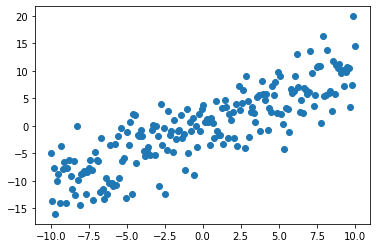

In [5]:
plt.scatter(x, y)

In [6]:
import tensorflow as tf

In [7]:
train_X = x
train_Y = np.array(y)

n_samples = train_X.shape[0]
learning_rate = 0.01
training_epochs = 100

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(-0.06, name="weight")
b = tf.Variable(-0.73, name="bias")

pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(pred-Y, 2.0)) / (2.0 * n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

sess = tf.Session()

sess.run(init)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [11]:
for i in range(0, training_epochs):
    for x1, y1 in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X:x1, Y: y1})
    if (i+1) % 50 == 0:
        c = sess.run(optimizer, feed_dict={X:x1, Y:y1})
        print(f"Epoch {i} Cost {c} W {sess.run(W)} b {sess.run(b)}")


Epoch 49 Cost None W 1.0509251356124878 b -0.5444254875183105
Epoch 99 Cost None W 1.0496991872787476 b -0.42520514130592346


In [15]:
noise = np.random.normal(0,4,200)
noise[:10]

array([  3.19710504,  -4.26571209, -12.10552685,   4.64185752,
         1.46609909,   2.00111907,  -7.66646001,  -2.38741364,
         1.78824039,  -2.78779532])

In [16]:
y = []
for i in range(0, len(x)):
    y.append(x[i]+noise[i])

In [18]:
test_X = x
test_Y = y

In [20]:
testing_cost = sess.run(tf.reduce_sum(tf.pow(pred - Y, 2.0)) / (2.0 * test_X.shape[0]) , feed_dict={X:test_X, Y: test_Y})
print(f"Testing cost= {testing_cost}")

Testing cost= 8.379524230957031
